In [90]:
import fpdf
from fpdf import FPDF

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

FILENAME = "template"
TITLE    =  "ID 165849     Partenza: ______,     Arrivo: ______,     km: _______"

N=10
df = pd.DataFrame([["", "", ""]]*10, columns=["Giro", "Staccati", "Fuga"])

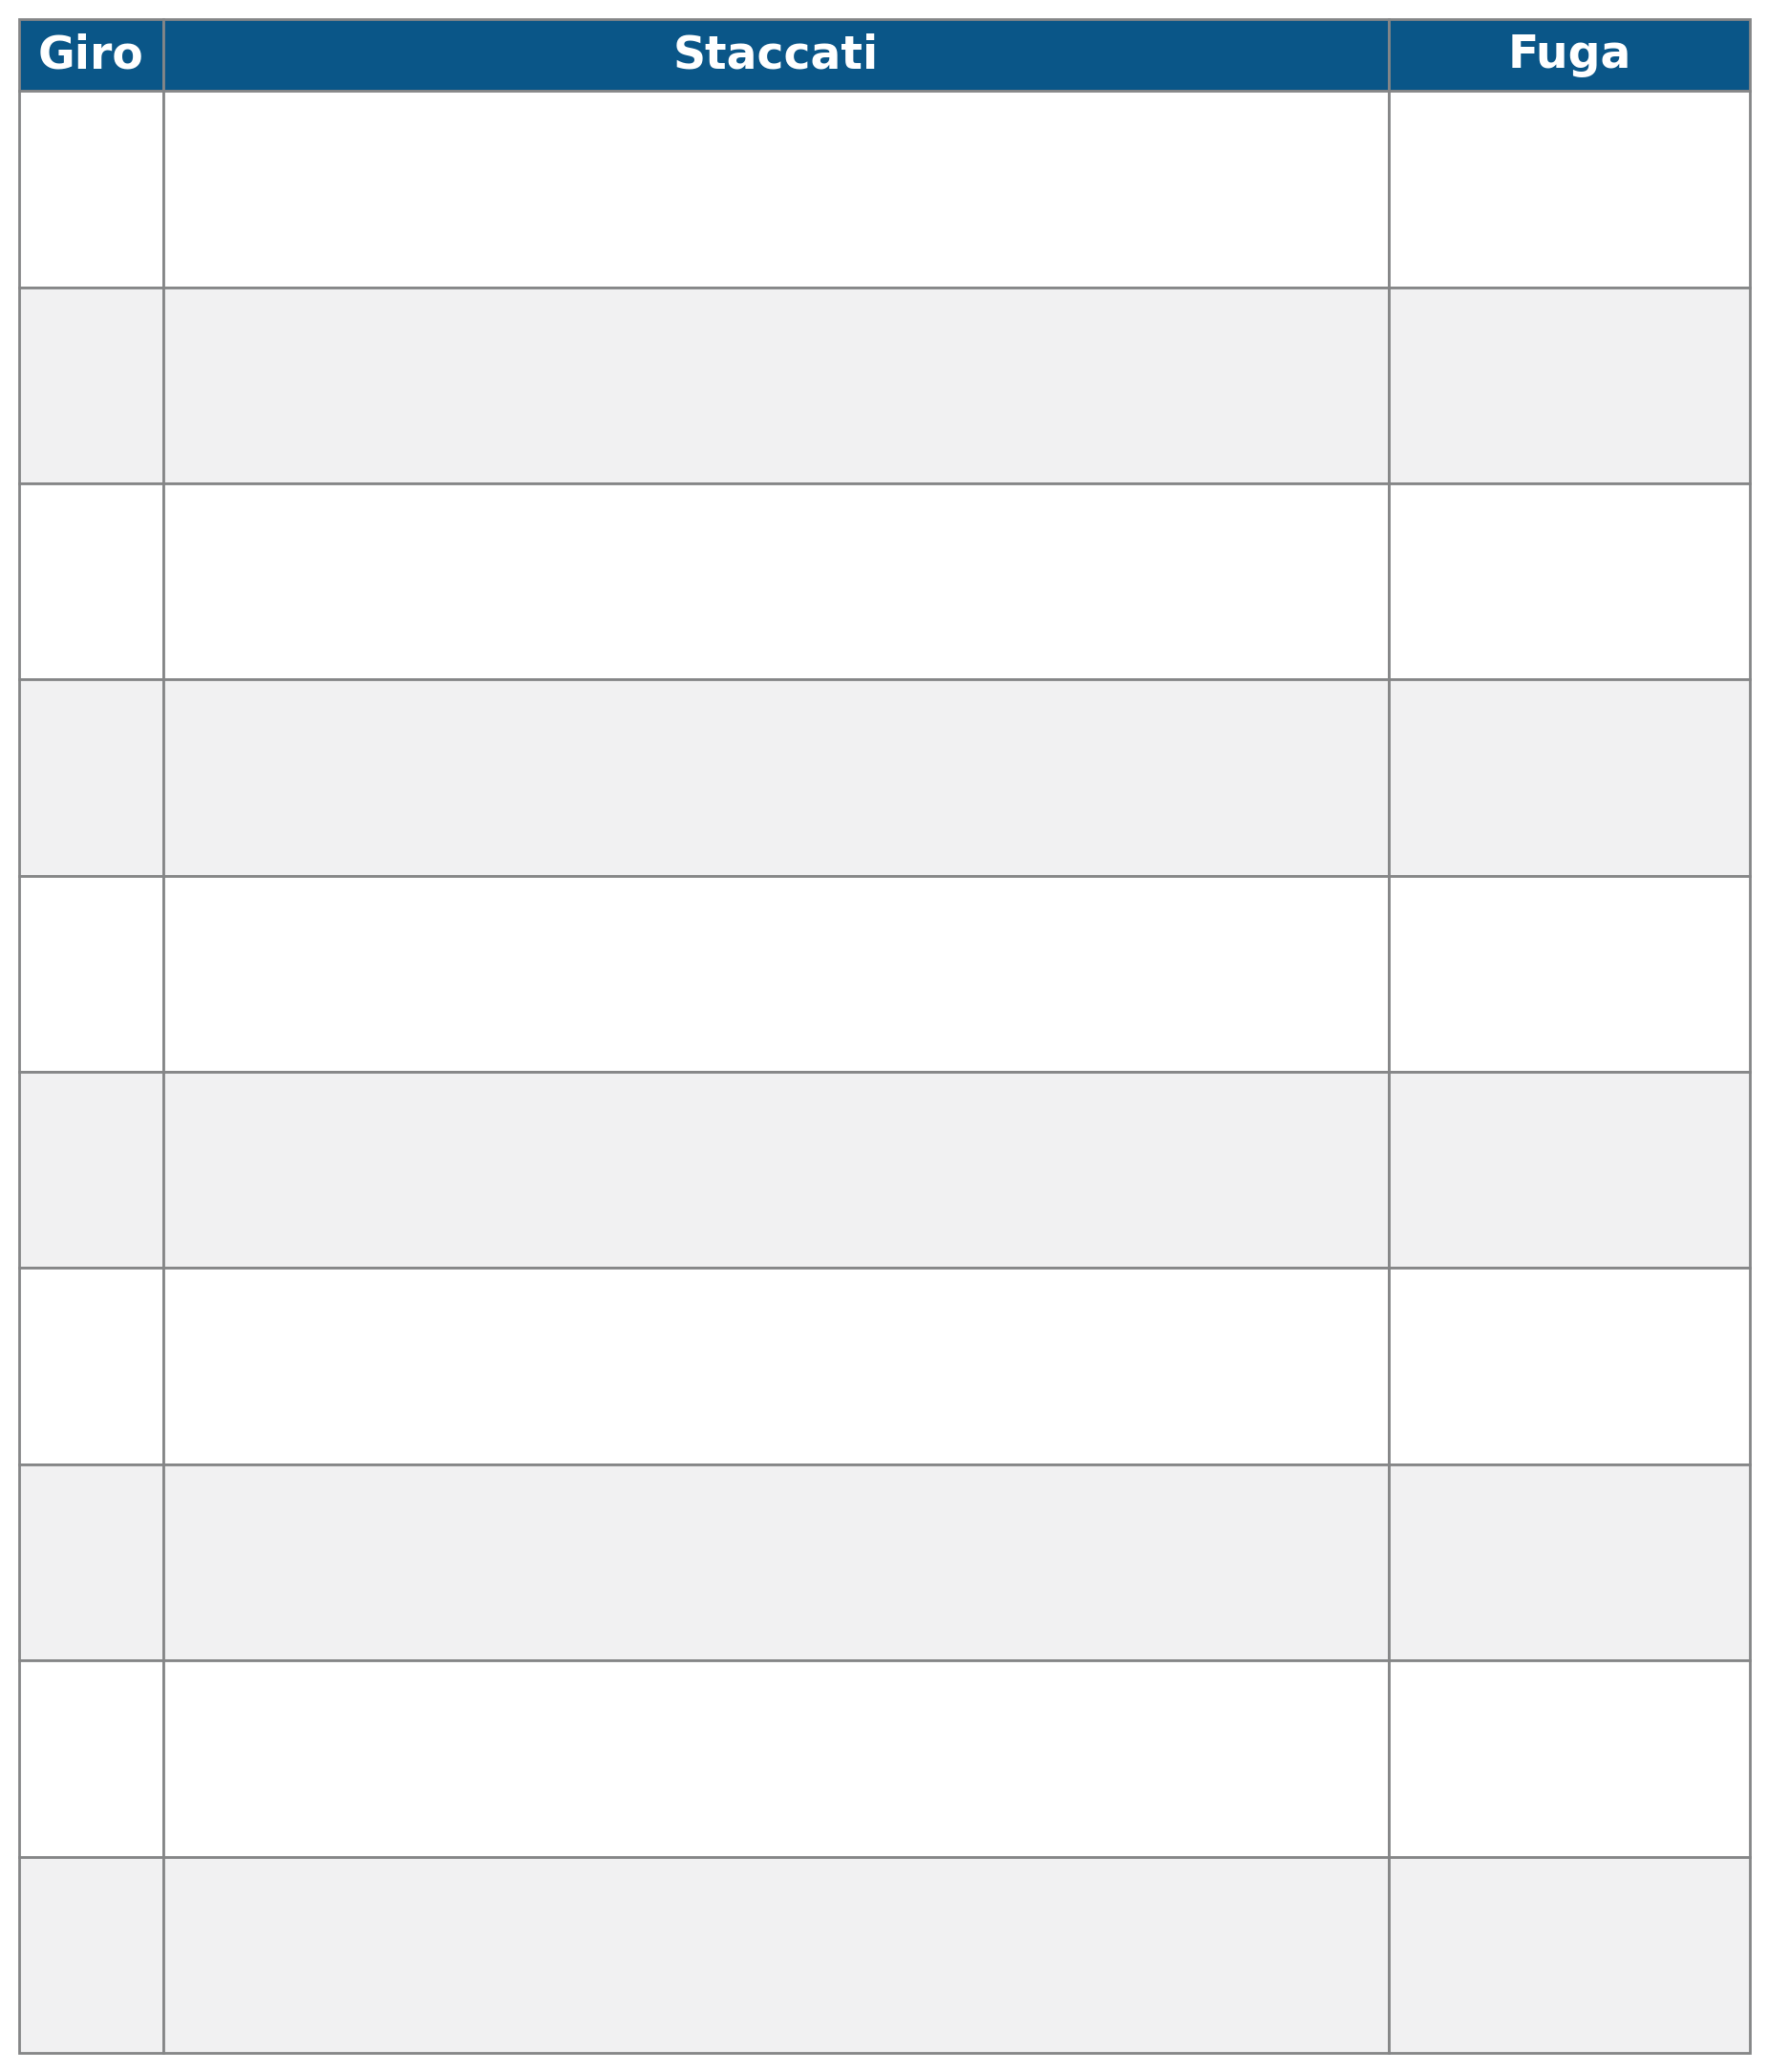

In [94]:
def generate_table(df, fname):
    edge_color      = '#858687'
    header_color    = '#0a5688'
    row_colors      = ['#f1f1f2', 'w']
    row_height      = 0.5
    # colWidths       = [0.27, 0.17, 0.05, 0.26, 0.05, 0.20]
    colWidths       = [0.08, 0.68, 0.20]


    fig, ax = plt.subplots(figsize=(11.69, len(df)*1.41), dpi=200)
    ax.axis('off')
    mpl_table = ax.table(cellText=df.values, colLabels=df.columns, bbox=[0,0,1,1], colWidths=colWidths)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(12.5)
    # mpl_table.auto_set_column_width(col=2)
    mpl_table.AXISPAD = 0.0005




    for k, index in enumerate(mpl_table._cells):
        cell = mpl_table._cells[index]
        cell.set_edgecolor(edge_color)
        cell.PAD = 0.04
        if index[0]==0:
            cell.set_text_props(weight='bold', color='w', size=17)
            cell.set_facecolor(header_color)        
            cell.set_height(0.22)

        else:
            cell.set_facecolor(row_colors[index[0]%len(row_colors) ])
            cell.set_height(0.6)




    strFile = "/home/nic/al/commissaire/tmp/{:s}.png".format(fname)
    if os.path.isfile(strFile):
        os.remove(strFile) # Opt.: os.system("rm " + strFile)
    # plt.tight_layout()
    plt.savefig(strFile,bbox_inches="tight")


N_split = 10

if N<=N_split:
    generate_table(df, fname=FILENAME)

else:
    generate_table(df[:N_split], fname=FILENAME)
    generate_table(df[N_split:], fname=FILENAME+"_2")


In [95]:
def create_letterhead(pdf, WIDTH):
    pdf.image("../resources/headerRegionale.png", 0, 8, WIDTH)

def create_title(pdf, title):
    pw = pdf.w - 2*pdf.l_margin
    pdf.set_font('Helvetica', '', 14)  
    pdf.ln(35)
    pdf.cell(pw, 0, title, 0, 0, 'C')
    pdf.ln(8)

def create_subtitle(pdf, title):
    pw = pdf.w - 2*pdf.l_margin
    pdf.set_font('Helvetica', '', 14)  
    pdf.cell(pw, 0, title, 0, 0, 'C')
    pdf.ln(10)

def create_paragraph(pdf, words):
    pdf.set_text_color(r=0,g=0,b=0)
    pdf.set_font('Helvetica', '', 12)
    pdf.write(5, words)


class PDF(FPDF):

    def footer(self):
        return
        # self.set_y(-15)
        # self.set_font('Helvetica', 'I', 8)
        # self.set_text_color(128)
        # self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')


WIDTH       = 210
HEIGHT      = 297

# Create PDF
pdf = PDF() # A4 (210 by 297 mm)
pdf.set_margins(left=10, top=10, right=-10)
pdf.add_page()

create_letterhead(pdf, WIDTH)
create_title(pdf, TITLE)

# Add table
pdf.image("../tmp/{:s}.png".format(FILENAME), w=190)
pdf.ln(10)

if N>N_split:
    pdf.image("../tmp/{:s}.png".format(FILENAME+"_2"), w=190)
    pdf.ln(10)


pdf.output("../out/{:s}.pdf".format(FILENAME), 'F')

''

In [96]:
os.system("cd ../out/; p2r -v {:s}.pdf -p FCI/2023 --rmapi /home/nic/utils/remarkable/rmapi".format(FILENAME))
os.system("/home/nic/utils/remarkable/rmapi mv {:s} /FCI/2023/{:s}".format(FILENAME,FILENAME))

2023-04-30 10:26:58 - INFO - Starting LocalFile provider
2023-04-30 10:26:59 - INFO - Preparing PDF using crop operation
2023-04-30 10:27:00 - INFO - Processing pages ... (1/1)
2023-04-30 10:27:00 - INFO - Shrinking pdf file ...
2023-04-30 10:27:01 - INFO - Shrinking has no effect for this file, using original.
2023-04-30 10:27:01 - INFO - Starting upload to reMarkable
2023-04-30 10:27:07 - INFO - Upload successful.


0